In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
!pip install torchsummary

import os
# remove local directory if it already exists
if os.path.isdir("ERA-V1-S7"):
    !rm -rf 'ERA-V1-S7'

!git clone https://github.com/pathToAIbyK/ERA-V1-S7.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'ERA-V1-S7'...
remote: Enumerating objects: 128, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 128 (delta 66), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (128/128), 406.03 KiB | 1014.00 KiB/s, done.
Resolving deltas: 100% (66/66), done.


In [2]:
# Train Phase transformations
train_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       # Note the difference between (0.1307) and (0.1307,)
                                       ])

# Test Phase transformations
test_transforms = transforms.Compose([
                                      #  transforms.Resize((28, 28)),
                                      #  transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
                                       transforms.ToTensor(),
                                       transforms.Normalize((0.1307,), (0.3081,))
                                       ])

In [3]:
train = datasets.MNIST('./data', train=True, download=True, transform=train_transforms)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transforms)

In [4]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [5]:
#import a python module from inside the library
import sys
sys.path.insert(1,f'/content/ERA-V1-S7')


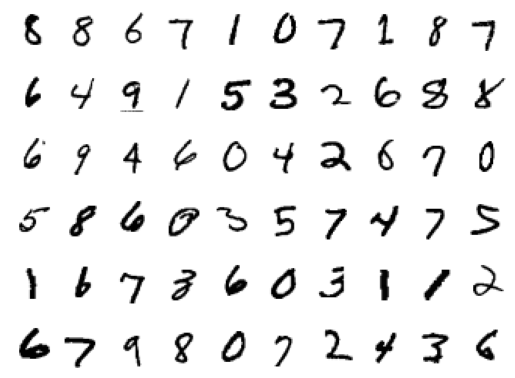

In [6]:
from utils import return_dataset_images

return_dataset_images(train_loader,60)

In [7]:
from model import Net_5,model_train,model_test

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net_5().to(device)
Net_5.model_summary(model,(1, 28, 28))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
       BatchNorm2d-2            [-1, 8, 28, 28]              16
            Conv2d-3           [-1, 16, 28, 28]           1,168
       BatchNorm2d-4           [-1, 16, 28, 28]              32
           Dropout-5           [-1, 16, 28, 28]               0
         MaxPool2d-6           [-1, 16, 14, 14]               0
            Conv2d-7            [-1, 8, 14, 14]           1,160
       BatchNorm2d-8            [-1, 8, 14, 14]              16
           Dropout-9            [-1, 8, 14, 14]               0
           Conv2d-10            [-1, 8, 14, 14]             584
      BatchNorm2d-11            [-1, 8, 14, 14]              16
          Dropout-12            [-1, 8, 14, 14]               0
        MaxPool2d-13              [-1, 8, 7, 7]               0
           Conv2d-14              

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    model_train(model, device, train_loader, optimizer, epoch)
    model_test(model, device, test_loader)

EPOCH: 0


Loss=0.11047015339136124 Batch_id=468 Accuracy=92.81: 100%|██████████| 469/469 [00:21<00:00, 21.59it/s]



Test set: Average loss: 0.0760, Accuracy: 9762/10000 (97.62%)

EPOCH: 1


Loss=0.07703083008527756 Batch_id=468 Accuracy=97.44: 100%|██████████| 469/469 [00:19<00:00, 23.48it/s]



Test set: Average loss: 0.0653, Accuracy: 9801/10000 (98.01%)

EPOCH: 2


Loss=0.05297594889998436 Batch_id=468 Accuracy=97.88: 100%|██████████| 469/469 [00:18<00:00, 24.86it/s]



Test set: Average loss: 0.0474, Accuracy: 9853/10000 (98.53%)

EPOCH: 3


Loss=0.024197867140173912 Batch_id=468 Accuracy=98.27: 100%|██████████| 469/469 [00:19<00:00, 24.43it/s]



Test set: Average loss: 0.0472, Accuracy: 9836/10000 (98.36%)

EPOCH: 4


Loss=0.028453366830945015 Batch_id=468 Accuracy=98.40: 100%|██████████| 469/469 [00:19<00:00, 23.92it/s]



Test set: Average loss: 0.0398, Accuracy: 9861/10000 (98.61%)

EPOCH: 5


Loss=0.03162843734025955 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:19<00:00, 24.54it/s]



Test set: Average loss: 0.0345, Accuracy: 9878/10000 (98.78%)

EPOCH: 6


Loss=0.10343427211046219 Batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:20<00:00, 22.70it/s]



Test set: Average loss: 0.0314, Accuracy: 9895/10000 (98.95%)

EPOCH: 7


Loss=0.022410092875361443 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:18<00:00, 24.71it/s]



Test set: Average loss: 0.0330, Accuracy: 9890/10000 (98.90%)

EPOCH: 8


Loss=0.039268605411052704 Batch_id=468 Accuracy=98.74: 100%|██████████| 469/469 [00:21<00:00, 21.61it/s]



Test set: Average loss: 0.0319, Accuracy: 9888/10000 (98.88%)

EPOCH: 9


Loss=0.033293284475803375 Batch_id=468 Accuracy=98.78: 100%|██████████| 469/469 [00:19<00:00, 24.66it/s]



Test set: Average loss: 0.0287, Accuracy: 9915/10000 (99.15%)

EPOCH: 10


Loss=0.007447950076311827 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:19<00:00, 24.41it/s]



Test set: Average loss: 0.0287, Accuracy: 9910/10000 (99.10%)

EPOCH: 11


Loss=0.07074982672929764 Batch_id=468 Accuracy=98.87: 100%|██████████| 469/469 [00:18<00:00, 24.88it/s]



Test set: Average loss: 0.0308, Accuracy: 9909/10000 (99.09%)

EPOCH: 12


Loss=0.11152409762144089 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:18<00:00, 24.91it/s]



Test set: Average loss: 0.0258, Accuracy: 9911/10000 (99.11%)

EPOCH: 13


Loss=0.02427562326192856 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:19<00:00, 23.51it/s]



Test set: Average loss: 0.0262, Accuracy: 9914/10000 (99.14%)

EPOCH: 14


Loss=0.009359394200146198 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:18<00:00, 25.19it/s]



Test set: Average loss: 0.0268, Accuracy: 9915/10000 (99.15%)



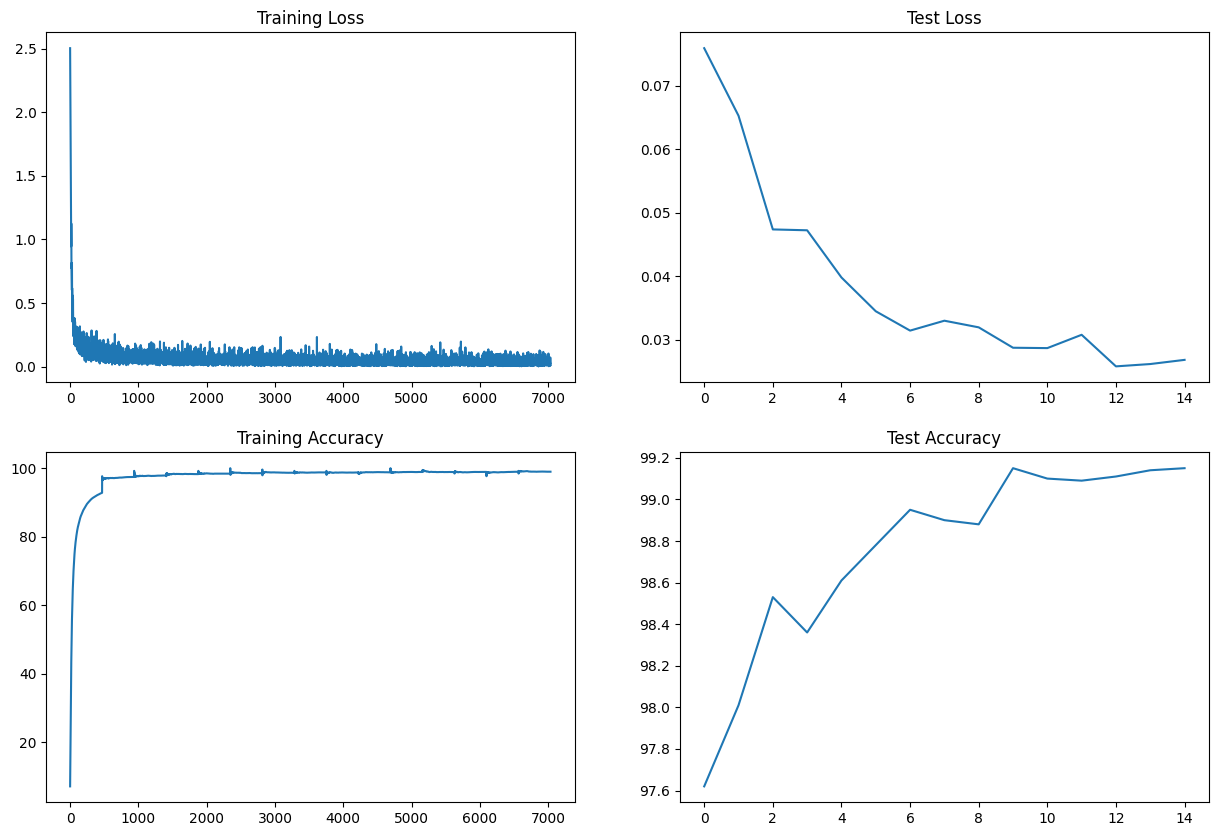

In [9]:
from model import draw_graph

draw_graph()